In [18]:
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
#data study 

In [19]:
data =load_data()

In [20]:
np.shape (data)

(2, 2)

In [21]:
(train_images,train_labels),(test_images,test_labels)=data

In [22]:
train_labels[0]

5

In [23]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
print("Shape of training data:",train_images.shape)
print("Shape of each Training example :",train_images[0].shape)
print ()
print("shape of testing data :",test_images.shape)
print("shape of each testing example :",test_images[0].shape)

Shape of training data: (60000, 28, 28)
Shape of each Training example : (28, 28)

shape of testing data : (10000, 28, 28)
shape of each testing example : (28, 28)


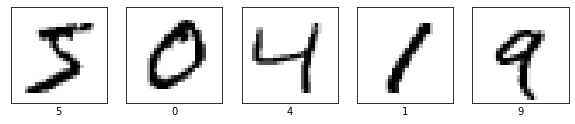

In [25]:
#visualization of data
#taking  5 images from tha data
plt.figure (figsize=(10,10))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

In [27]:
 #step 3 =data preprocessing 
 #just bringin in the data in 0-1 range
 np.unique(train_images[0])
train_images=train_images/255.0
test_images=test_images/255.0


In [28]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])

In [29]:
hidden_layer=model.layers[1]
weights=hidden_layer.get_weights()
print("Shape of weights:",np.shape(weights[0]))
print("Shape of biases:",np.shape(weights[1]))

Shape of weights: (784, 128)
Shape of biases: (128,)


In [30]:

output_layer=model.layers[2]
weights=output_layer.get_weights()
print("shape of weights :",np.shape(weights[0]))
print("shape of biases :",np.shape(weights[1]))


shape of weights : (128, 10)
shape of biases : (10,)


In [31]:
#compilation of model
#one input layer on hidden layer and one output layer 
sgd=keras.optimizers.SGD(lr=0.5,decay=1e-6, momentum=0.5)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#NN created


In [32]:
#model Training 
history=model.fit(train_images,train_labels,epochs=10,batch_size=100,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 43us/sample - loss: 2.4190 - accuracy: 0.1012 - val_loss: 2.3928 - val_accuracy: 0.0952
Epoch 2/10
54000/54000 [==============================] - 2s 30us/sample - loss: 2.3511 - accuracy: 0.1030 - val_loss: 2.4077 - val_accuracy: 0.0978
Epoch 3/10
54000/54000 [==============================] - 1s 25us/sample - loss: 2.3335 - accuracy: 0.1053 - val_loss: 2.3477 - val_accuracy: 0.0978
Epoch 4/10
54000/54000 [==============================] - 1s 25us/sample - loss: 2.3239 - accuracy: 0.1036 - val_loss: 2.3315 - val_accuracy: 0.0992
Epoch 5/10
54000/54000 [==============================] - 1s 23us/sample - loss: 2.3186 - accuracy: 0.1042 - val_loss: 2.3212 - val_accuracy: 0.0952
Epoch 6/10
54000/54000 [==============================] - 1s 23us/sample - loss: 2.3135 - accuracy: 0.1107 - val_loss: 2.3060 - val_accuracy: 0.1045
Epoch 7/10
54000/54000 [==============================] -

In [16]:
c

NameError: name 'c' is not defined

In [33]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 2.2825 - accuracy: 0.1920
Test accuracy 0.192


In [ ]:
predictions=model.predict(test_images)

In [ ]:
def plot_confidence(images,labels,predictions):
  plt.figure(figsize=(15,30))
  plt.subplots_adjust(top=0.99,bottom=0.01,hspace=1.5,wspace=0.4)
  plot_index=0
  for i in range(len(images)):
    plot_index+=1
    plt.subplot(len(images),2,plot_index)
    plt.imshow(images[i],cmap=plt.cm.binary)
    correct_label=str(labels[i])
    predicted_label=str(np.argmax(predictions[i]))
    title='Corrected Label:'+str(labels[i])+'\n'+ 'predicted_label:'+str(np.argmax(predictions[i]))
    
    if predicted_label !=correct_label:
      plt.title(title,backgroundcolor='r',color='w')
    else:
      plt.title(title,backgroundcolor='g',color='w')
    plt.xticks([])
    plt.yticks([])
    plot_index+=1
    plt.subplot(len(images),2,plot_index)
    plt.bar(range(10),predictions[i])
    plt.xticks(range(10))
    plt.ylim(0,1)
    



In [ ]:
#visualize predictions from datset
images= test_images[:10]
labels= test_labels[:10]
test_predictions= predictions[:10]
plot_confidence(images,labels,test_predictions)


In [ ]:
#visual prediction fo incorrect samples
incorrect_indices=list()
for i in range (len(predictions)):
    predicted_label=np.argmax(predictions[i])
    if predicted_label!=test_labels[i]:
        incorrect_indices.append(i)
print('Number of incorrectly classified images :',len(incorrect_indices))
incorrect_indices=incorrect_indices[:10]

incorrect_images=[test_images[i] for i in incorrect_indices]
incorrect_labels=[test_labels[i] for i in incorrect_indices]
incorrect_predictions=[predictions[i] for i in incorrect_indices]

plot_confidence(incorrect_images,incorrect_labels,incorrect_predictions)


        